# Import Libraries

In [24]:
# data manipulation
import pandas as pd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# NLP
import string

import spacy
from spacy.tokens.doc import Doc
from spacy.matcher import Matcher

from wordcloud import WordCloud

import nltk
from nltk.probability import FreqDist

import re

# machine learning
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

nlp = spacy.load('en_core_web_md')

# Helper Functions

In [25]:
def get_n_color_palette(palette_name, n_colors, as_hex=False):
    palette = sns.color_palette(palette=palette_name, n_colors=n_colors)
    if as_hex:
        palette = palette.as_hex()
    palette.reverse()
    return palette

# Load and Prepare Data

For faster execution times, select subset of the categories out of the 20 categories

In [26]:
subset_categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

In [27]:
newsgroups_data = fetch_20newsgroups(subset='all', categories=subset_categories)

In [28]:
categories = newsgroups_data.target_names

In [29]:
df = pd.DataFrame(data={
    'text': newsgroups_data.data,
    'category': newsgroups_data.target
})

In [30]:
df.shape

(3759, 2)

In [31]:
df['category'] = df['category'].apply(lambda x: categories[x])

In [32]:
df.head()

,text,category
0,From: geb@cs.pitt.edu (Gordon Banks)\nSubject:...,sci.med
1,From: swf@elsegundoca.ncr.com (Stan Friesen)\n...,soc.religion.christian
2,From: David.Bernard@central.sun.com (Dave Bern...,soc.religion.christian
3,From: hotopp@ami1.bwi.wec.com (Daniel T. Hotop...,comp.graphics
4,From: billc@col.hp.com (Bill Claussen)\nSubjec...,sci.med


# What is this Data?

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.

The data is organized into 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. `comp.sys.ibm.pc.hardware` / `comp.sys.mac.hardware`), while others are highly unrelated (e.g `misc.forsale` / `soc.religion.christian`).

Here is a list of the 20 newsgroups, partitioned (more or less) according to subject matter:

<table style='font-family:"Courier New", Courier, monospace; font-size:80%'>
    <tr>
        <td>comp.graphics<br>comp.os.ms-windows.misc<br>comp.sys.ibm.pc.hardware<br>comp.sys.mac.hardware<br>comp.windows.x
        </td>
        <td>rec.autos<br>rec.motorcycles<br>rec.sport.baseball<br>rec.sport.hockey</td>
        <td>sci.crypt<br>sci.electronics<br>sci.med<br>sci.space</td>
    </tr>
    <tr>
        <td>misc.forsale</td>
        <td>talk.politics.misc<br>talk.politics.guns<br>talk.politics.mideast</td>
        <td>talk.religion.misc<br>alt.atheism<br>soc.religion.christian</td>
    </tr>
</table>

# Data Statistics

In [33]:
categories_statistics_df = df.groupby(by='category')['text'].agg({
                                'count': lambda x: x.size,
                                'mean': lambda x: x.str.len().mean(),
                                'max': lambda x: x.str.len().max(),
                                'min': lambda x: x.str.len().min()
                            })\
                            .reset_index()\
                            .sort_values(by='count', ascending=False)

/home/resaln/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version



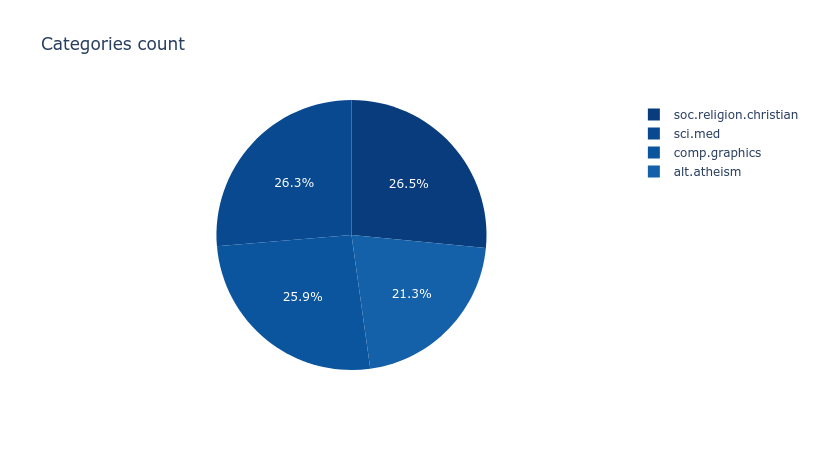

In [34]:
fig = px.pie(data_frame=categories_statistics_df, names='category', values='count',
            color_discrete_sequence=get_n_color_palette('Blues', 20, True),
            title='Categories count')
fig.show()

It's obvious that the dataset is *balanced*

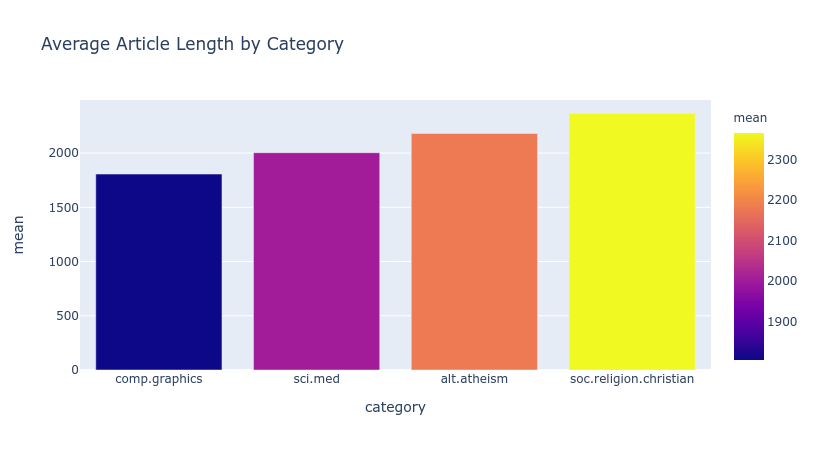

In [35]:
fig = px.bar(data_frame=categories_statistics_df.sort_values(by='mean'), x='category', y='mean',
            color='mean', title='Average Article Length by Category')
fig.show()

This chart shows how long the *polictics* articles, compared to *computer* articles

# Word Cloud

In [36]:
en_stop_words = nlp.Defaults.stop_words

In [37]:
categories_text_df = df.groupby(by='category')\
                        .agg({
                            'text': ' '.join
                        })\
                        .reset_index()

In [38]:
categories_text_df

,category,text
0,alt.atheism,From: vdp@mayo.edu (Vinayak Dutt)\nSubject: Re...
1,comp.graphics,From: hotopp@ami1.bwi.wec.com (Daniel T. Hotop...
2,sci.med,From: geb@cs.pitt.edu (Gordon Banks)\nSubject:...
3,soc.religion.christian,From: swf@elsegundoca.ncr.com (Stan Friesen)\n...


In [39]:
def plot_word_cloud(category_name, category_text):
    plt.subplots(figsize = (8,8))
    wc = WordCloud(background_color="white", stopwords=en_stop_words, width=1000, height=600)
    wc.generate(category_text)
    plt.title(label=category_name)
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show()

In [40]:
# for idx, row in categories_text_df.iterrows():
#     category_name, category_text = row['category'], row['text']
#     plot_word_cloud(category_name, category_text)

## Bigrams WordCloud

In [41]:
text = categories_text_df[categories_text_df['category'] == 'talk.politics.mideast']\
                        ['text']\
                        .values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [42]:
bigrams = list(nltk.bigrams(text.split()))

NameError: name 'text' is not defined

In [43]:
bigrams_freq = dict(FreqDist(bigrams))

NameError: name 'bigrams' is not defined

In [44]:
bigrams_freq = {
    ' '.join(k): v for k, v in bigrams_freq.items()
}

NameError: name 'bigrams_freq' is not defined

NameError: name 'bigrams_freq' is not defined

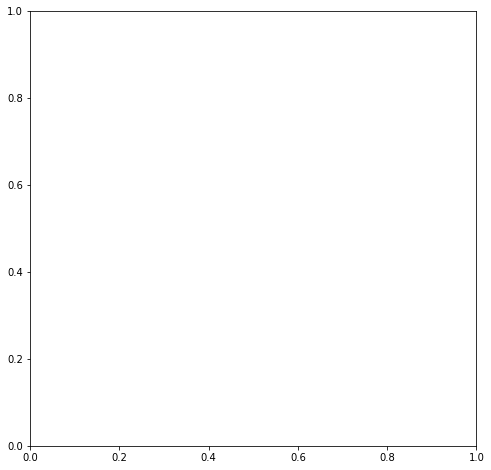

In [45]:
plt.subplots(figsize = (8,8))
wc = WordCloud(background_color="white", stopwords=en_stop_words, width=1000, height=600)
wc.generate_from_frequencies(bigrams_freq)
plt.title(label='talk.politics.mideast')
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

# Playing around with `spaCy`

In [46]:
articles = df['text'].to_list()

In [47]:
email_pattern = [
    {
        "TEXT": {
            "REGEX": ".+@.+"
        }
    },
    {
        "TEXT": {
            "IN": ["."]
        }
    },
    {
        "TEXT": {
            "REGEX": ".+"
        }
    }
]

matcher = Matcher(nlp.vocab)

matcher.add("email_pattern", None, email_pattern)

In [48]:
def is_clean_token(token):
    # a token is *clean* if it satisfies the following conditions:
    # 1- token is not written number (one, two, hundred, ...) and not digit number (1, 2, 100, ...)
    # 2- token is not email and not URL
    # 3- token is not a STPWORD and not a punctuation
    # 4- token contains only ascii characters, and token contains only alphabetic characters
    # TODO:
    #   This function need a review, a punctuation might be useful, for tokens like `'re' which is `are`
    return not (token.like_num or token.is_digit or token.like_url 
                or token.like_email or token.is_stop or token.is_punct
                or not token.is_ascii or not token.is_alpha)

In [49]:
def clean_tokens_component(doc):

    # delete `DATE` entities
    tokens = [token for token in doc if token.ent_type not in ['DATE']]

    # keep only clean tokens
    tokens = [token for token in tokens if is_clean_token(token)]
    
    # lemmatization
    tokens = [token.lemma_ for token in tokens]
    
    # convert to lower case
    tokens = [lemma.lower() for lemma in tokens]

    # construct resulting Doc object
    return Doc(doc.vocab, words=tokens)

In [50]:
# if nlp.has_pipe('clean_tokens_component'):
#     nlp.replace_pipe('clean_tokens_component', clean_tokens_component)
# else:
#     nlp.add_pipe(clean_tokens_component, last=True)

In [51]:
# docs = list(nlp.pipe(articles, batch_size=100))

In [52]:
# docs_text = list(map(lambda x: x.text, docs))

In [53]:
# words = (' '.join(docs_text)).split()

In [54]:
# words_freq = FreqDist(words)

# Split the data

In [84]:
X = df['text']
y = df['category']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Text Vectorization

In [86]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
punctuations = string.punctuation

In [87]:
def spacy_analyzer(document):
    
    # apply the language pipeline on the passed document
    doc = nlp(document)
    
    # perform only tokenization
    tokens = [token.lemma_.lower() for token in doc if
              not token.is_stop #remove stop words
              and not token.is_digit #remove digits
              and not token.like_num #remove numbers
              and not token.like_email #remove emails
              and not token.like_url #remove URLs
              and token.is_alpha #keep only alphabetic tokens
              and token.is_ascii #keep only ascii tokens
              and len(token.lemma_.lower()) > 2 #keep only token which has length greater than two letters
             ] 
    
    return tokens

# Classification

In [88]:
vectorizer = TfidfVectorizer(analyzer=spacy_analyzer)

In [89]:
%%time
vectorizer = vectorizer.fit(X)

CPU times: user 3min 36s, sys: 392 ms, total: 3min 37s
Wall time: 3min 37s


In [90]:
len(vectorizer.get_feature_names())

30235

In [91]:
%%time
X_train_vec = vectorizer.transform(X_train)

CPU times: user 2min 42s, sys: 292 ms, total: 2min 43s
Wall time: 2min 43s


In [92]:
%%time
X_test_vec = vectorizer.transform(X_test)

CPU times: user 51.1 s, sys: 68 ms, total: 51.1 s
Wall time: 51.1 s


In [93]:
X_train.shape, X_train_vec.shape

((2819,), (2819, 30235))

In [94]:
X_test.shape, X_test_vec.shape

((940,), (940, 30235))

In [96]:
encoder = LabelEncoder()

In [97]:
encoder.fit(y)

LabelEncoder()

In [100]:
y_train_labels = encoder.transform(y_train)

In [101]:
y_test_labels = encoder.transform(y_test)

# Classification

In [111]:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')

In [113]:
%%time
clf.fit(X_train_vec, y_train_labels)

CPU times: user 2.15 s, sys: 1.45 s, total: 3.6 s
Wall time: 1.06 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
y_pred = clf.predict(X_test_vec)

In [115]:
y_pred.shape

(940,)

In [117]:
from sklearn import metrics

In [129]:
print(metrics.classification_report(y_true=y_test_labels, y_pred=y_pred, target_names=encoder.classes_))

                        precision    recall  f1-score   support

           alt.atheism       1.00      0.85      0.92       200
         comp.graphics       0.95      0.99      0.97       243
               sci.med       0.97      0.99      0.98       248
soc.religion.christian       0.92      0.98      0.95       249

              accuracy                           0.96       940
             macro avg       0.96      0.95      0.95       940
          weighted avg       0.96      0.96      0.96       940



In [131]:
metrics.confusion_matrix(y_true=y_test_labels, y_pred=y_pred, la)

array([[170,   8,   3,  19],
       [  0, 241,   1,   1],
       [  0,   3, 245,   0],
       [  0,   3,   3, 243]])